# ANOVA one-way/Kruskal test

### Исследовательский вопрос: Компания SST равномерно во времени специализацируется на типе судов?
#### H0: средний год постройки судов отличается незначимо от типа судна
#### Hа: средний год постройки значимо зависит от типа судна
#### Уровень значимости: 1%

In [1]:
import numpy as np
from scipy import stats as ss
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_excel(r'Data.xlsx')

In [3]:
df['year']=df['DELIVERY'].dt.year

In [4]:
df[['TYPE','DELIVERY']].groupby(['TYPE']).count().sort_values(['DELIVERY'], ascending=False).head(10)

,DELIVERY
TYPE,
LNG Carrier,378
LNGC,76
Scrapped LNG Carrier,22
FSRU,17
Ice Class LNG Carrier,13
Regas Vessel,10
VLEC,6
LNG/LPG,6
Regas vessel,5


In [5]:
df['Group']=df['TYPE'].apply(lambda x: 'LNGC' if x=='LNGC' or x=='LNG Carrier' else ('SLNGC' if x=='Scrapped LNG Carrier' else 'Other'))

In [6]:
df_LNGC=df[df.Group=='LNGC']

df_SLNGC=df[df.Group=='SLNGC']

df_other=df[df.Group=='Other']

In [7]:
a=ss.f_oneway(df_LNGC['year'],df_other['year'],df_SLNGC['year'])
b=ss.kruskal(df_LNGC['year'],df_other['year'],df_SLNGC['year'])

df_result=pd.DataFrame({'Method':['one_way','kruskal'],
                       'stat':[a[0],b[0]],
                       'p-value':[a[1],b[1]]})
df_result

,Method,stat,p-value
0,one_way,176.464192,6.574753e-60
1,kruskal,66.527365,3.579037e-15


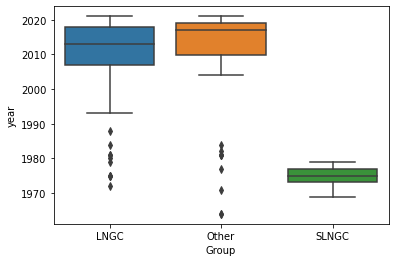

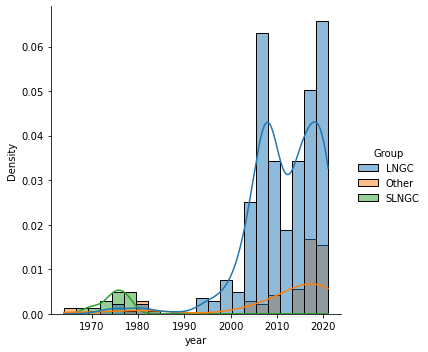

In [8]:
sns.boxplot(x="Group", y='year', data=df)

sns.displot(df,x="year",hue="Group", stat='density', kde=True)

#### Дисперсионный анализ демонстрирует, что средний год строительства по типу судов значимо различается хотя бы в одной паре (H0 отклоняется на 0,01 уровне значимости)

#### Графический анализ подверждает, что тип судов SLNGC аномально отличается от других типов

#### Для последующего анализа необходимо исключить из исследования группу SLNGC и внутригрупповые аномалии




In [9]:
df_LNGC=df[df.Group=='LNGC']
df_LNGC['Percent']=df_LNGC.year.rank(pct=True)
df_LNGC=df_LNGC[(df_LNGC.Percent>0.15)&(df_LNGC.Percent<0.85)]

df_other=df[df.Group=='Other']
df_other['Percent']=df_other.year.rank(pct=True)
df_other=df_other[(df_other.Percent>0.15)&(df_other.Percent<0.85)]

<ipython-input-9-2ab390026bbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LNGC['Percent']=df_LNGC.year.rank(pct=True)
<ipython-input-9-2ab390026bbb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other['Percent']=df_other.year.rank(pct=True)


In [10]:
df_2=pd.concat([df_LNGC,df_other]).reset_index()

In [11]:
a=ss.f_oneway(df_LNGC['year'],df_other['year'])
b=ss.kruskal(df_LNGC['year'],df_other['year'])


df_result=pd.DataFrame({'Method':['one_way','kruskal'],
                       'stat':[a[0],b[0]],
                       'p-value':[a[1],b[1]]})
df_result

,Method,stat,p-value
0,one_way,21.631553,0.000005
1,kruskal,21.527340,0.000003


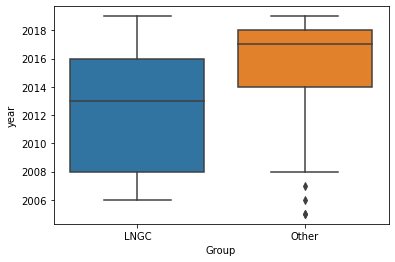

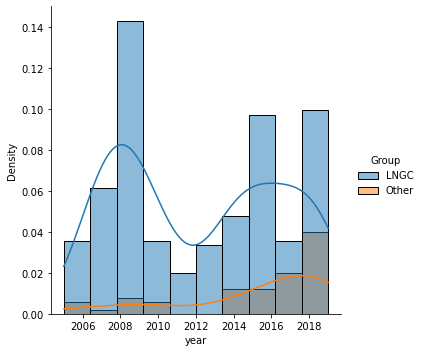

In [12]:
sns.boxplot(x="Group", y='year', data=df_2)
sns.displot(df_2,x="year",hue="Group", stat='density', kde=True)

#### Дисперсионный анализ демонстрирует, что средний год строительства в группе LNGC и Other существенно отличается (H0 отклоняется на 0,01 уровне значимости)

## Вывод: Компания на 1% уровне значимости неравномерно во времени специализируется на типе судов